# 4. Calculus & Statistics

Agenda:
* Concluding the gradient descent method
* The method of Lagrange multipliers
* Mean, variance, covariance for one-dimensionsal data sets
* Covariance matrix for higher dimensional data sets
* Inner products
* Projections
* PCA

How do linear transformations affect the mean and the variance. Also for the higher dimensional data.

Inner products:
    Explain inner products as a generalisation of the dot product
    - A symmetric, positive definite, bilinear mapping
    - Sylvester criteria for pos.def.
    - triangle ineq.
    - Cauchy-Schwarz ineq.
    Compute angles and distances using inner products
    Write code that computes distances and angles between images
    Demonstrate an understanding of properties of inner products
    Discover that orthogonality depends on the inner product
    Inner product of functions
    orthogonality of variables

--------------

**Exercise**

1. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit1.png" width="350"> 
</center>

In [ ]:
%run 'questions/questions3_1.py'

2. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit2.png" width="350"> 
</center>

In [ ]:
%run 'questions/questions3_2.py'

3. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit3.png" width="350"> 
</center>

In [ ]:
%run 'questions/questions3_3.py'

4. For which starting points will the gradient descent method lead us to the phone on the below surface?

<center>
<img src="Images/Sandpit2.png" width="350"> 
</center>

5. Can you imagine a surface where the gradient descent algorithm gets stuck?

6. Can you imagine such a surface with two starting points very close to each other, which lead to totally different local extrema?

---------------

**Exercise**

Discuss the [gradient descent types used in a machine learning context](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a) with your team, collect the major characteristics of the one allocated to your team.

---------------

## 4.1. The method of Lagrange multipliers

--------------

Let $f: \mathbb{R}^n \to \mathbb{R}$ and $g: \mathbb{R}^n \to \mathbb{R}$ be two functions.

**Goal:** Minimise the value $f(x)$ under the constraint $g(x) = 0$, i.e.

\begin{align*}
\left\{\begin{array}{ll}
\mbox{target function:}& f(x) \to \min\\
\mbox{constraint:}& g(x) = 0
\end{array}
\right.
\end{align*}

### 4.1.1. Developing an intuition

----------------
**Exercise**

To derive the general theory of the Lagrange multipliers method, play with the two GeoGebra applets below and find the points for which the function $f$ attains its minimum under the constraint $g = 0$. 

* In the first applet on the left hand side the formulas of the target function $f$ and of $g$ (describing the constraint) are explicitely provided. The function $f$ is plotted by its concentric contour lines. The set of points satisfying the constraint is a parabola in this case, its graph is plotted in blue. You can move the blue point on the parabola. The contour line, on which the point is situated, is plotted in red and the value of the target function reached on this line is also provided. The current coordinates of the blue point $(x_0, y_0)$ are indicated in red on the left.

The solution of the first constrained optimisation problem: $(x,y) = (...,...)$.

* Figure out how should we use the second app to solve the constrained minimisation problem on the surface given by its contour lines under the constraint given by the blue circle.

The solution of the second constrained optimisation problem is: $(x,y) = (...,...)$.

Do you observe something interesting about the solutions? Do they have something in common?
...............................................

In [ ]:
from IPython.display import IFrame

IFrame("https://www.geogebra.org/classic/vbbkutmc", 1100, 600)

In [ ]:
IFrame("https://www.geogebra.org/classic/kr3vzrvm", 1100, 700)

<!--To explain intuitively our observation consider the surface described by the funcion $\underbrace{f(x,y)}_{z} = x^2 + y^2$. If you run the code in the cell below, this surface will be plotted. Consider the additional explanation on the whiteboard-->

In [ ]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np

x = np.arange(-10, 10, 0.5)
y = np.arange(-10, 10, 0.5)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize = (14, 7))

#first subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)

#fig.tight_layout()

#second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### 4.1.2 Formalising the method of Lagrange multipliers

The behaviour that we have observed for the two particular exmaples can be generalised. For any extremum point $x$ of $f$ under the constraint $g = 0$ it holds that their gradients should be alined, i.e. there exists a coefficient $\lambda \in \mathbb{R}$ such that

\begin{align}
    \nabla f(x) = \lambda \nabla g(x) \quad \quad (1)
\end{align}

Of course the point $x$ we are looking for should also satisfy the constraint equation 

$$g(x) = 0 \quad \quad \quad \quad \ \ \  \ (2)$$

Let us define the Lagrangian function $\mathcal{L}: \mathbb{R}^n \times \mathbb{R}$ by 
$$\mathcal{L}(x,\lambda) = f(x) - \lambda g(x)$$

The gradient of the Lagrangian is

$$\nabla \mathcal{L}(x,\lambda) = \nabla \mathcal{L}(\overbrace{x_1, x_2, \ldots, x_n}^{x},\lambda) = \Big(\overbrace{\frac{\partial \mathcal{L}}{\partial x_1}, \frac{\partial \mathcal{L}}{\partial x_2}, \ldots, \frac{\partial \mathcal{L}}{\partial x_n}}^{\nabla_x \mathcal{L}}, \frac{\partial \mathcal{L}}{\partial \lambda} \Big) = \Big(\overbrace{\frac{\partial(f-\lambda g)}{\partial x_1}, \frac{\partial(f-\lambda g)}{\partial x_2}, \ldots, \frac{\partial(f-\lambda g)}{\partial x_n}}^{\quad \quad \quad \nabla(f-\lambda g)\ =\ \nabla f - \lambda \nabla g}, -g \Big)$$

Thus equations (1) and (2) are equivalent to

$$\nabla \mathcal{L}(x, \lambda) = 0$$

Our goal was to find the solutions of the constrained optimisation problem. We have managed to conclude that all the solutions should satisfy $\nabla \mathcal{L}(x, \lambda) = 0$, i.e. they should be stationary points of the associated Lagrangian $\mathcal{L}(x,\lambda) = f(x) - \lambda g(x)$. 

The method of Lagrange multilpliers for solving constrained optimisatiosn problems formulated in two steps:
* find the candidates, i.e. the stationary points of the Lagrangian,
* check for which of them is the value of the target function optimal.

-----------------

### 4.1.3 Visual summary for the method of Lagrange multipliers
Let $f, g: \mathbb{R}^n \to \mathbb{R}$ be two differentiable functions.

For a fixed $\lambda \in \mathbb{R}$ we defined the Lagrangian $\mathcal{L}: \mathbb{R}^n \times \mathbb{R} \to \mathbb{R}$ as 

$$\mathcal{L}(x, \lambda) = f(x) - \lambda g(x)$$

**The method of Lagrange multipliers**

\begin{align*}
\left\{\begin{array}{ll}
\mbox{target function:}& f(x) \to \min\\
\mbox{constraint:}& g(x) = 0
\end{array}
\right. \quad \Rightarrow \quad 
\left\{\begin{array}{l}
\exists \lambda:  \nabla f(x) = \lambda \nabla g(x)\\
 g(x) = 0
\end{array}
\right. \quad \Leftrightarrow \quad \nabla \mathcal{L}(x,\lambda) = 0
\end{align*}

----------------
**Exercise**

Minimise the function $f(x,y) = 0.5(y-x)^2 + 0.5(1-x)^2$ under the constraint $\frac{x^2}{40^2} + \frac{y^2}{20^2} = 1$ by using the Lagrange multipliers method. You can do so, by carrying out the calculations by hand or by completing the below code with the missing functions. Check whether your solution is realistic by taking a look at the plot of the surface with its contour lines and gradients and of the curve satisfying the constraint.

In [ ]:
# Import libraries
import numpy as np
from scipy import optimize

# First we define the functions, YOU SHOULD IMPLEMENT THESE
def f(x, y):
    return ....

def g(x, y):
    return .....

# Next their derivatives, YOU SHOULD IMPLEMENT THESE
def dfdx(x, y):
    return ......

def dfdy(x, y):
    return .....

def dgdx(x, y):
    return ......

def dgdy(x, y):
    return .......

# We define the gradient of the Lagrangian function.
def DL(xyλ):
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

# We use the optimize.root method to find the roots of the Lagrangian.

x0, y0, λ0 = (10, 10, 0)
x, y, λ = optimize.root(DL, [x0, y0, λ0]).x
print(f"x = {x:.3f}")
print(f"y = {y:.3f}")
print(f"λ = {λ:.3f}")
print(f"f(x, y) = {f(x,y):.3f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feature_x = np.arange(-50, 50, 4)
feature_y = np.arange(-50, 50, 4)

x, y = np.meshgrid(feature_x, feature_y)
f = 0.5*(y-x)**2 + 0.5*(1-x)**2 #x**2 - y**2 #0.5*(y-x)**2 + 0.5*(1-x)**2
dfdx = 2*x - y - 1 #2*x #2*x - y - 1
dfdy = y-x #-2*y #y - x

# Normalize all gradients to focus on the direction not the magnitude
norm = np.linalg.norm(np.array((dfdx, dfdy)), axis=0)
dfdx = dfdx / norm
dfdy = dfdy / norm

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect(1)
#ax.plot(feature_x, feature_y, c='k')
ax.quiver(x, y, dfdx, dfdy, units='xy', scale=0.3, color='gray')
ax.contour(x, y, z, 15, cmap='jet')

#g_x = np.arange(-10, 10, 0.1)
#g_y = g_x**2
angle = np.arange(0, 2*np.pi, 0.1)
g_x = 40*np.cos(angle)
g_y = 20*np.sin(angle)
ax.plot(g_x,g_y, '-r')
ax.set_ylim([-50,50]);

#arrow = FancyArrowPatch((35, 35), (35+34*0.2, 35+0), arrowstyle='simple',
#                        color='r', mutation_scale=10)  
#ax.add_patch(arrow)  # NOTE: this gradient is scaled to make it better visible

--------------------

**Last remark on calculus**

Towards the end of the 17th century, beginning of the 18th century there was a big fight between Newton and Leibniz, who both started to develop and formalise the theory of calculus. You can read more about it [here](https://en.wikipedia.org/wiki/Leibniz%E2%80%93Newton_calculus_controversy).

## 4.2 Basic concepts of descriptive statistics

- Projection to a subspace
- Real symmetric matrices
- PCA



PCA is a method for linear dimensionality reduction.

----------------------------
### 4.2.1 Mean, variance, standard deviation
Instead of working directly with the data many times we want to characterise it by its mean, variance and correlation between the observed features.

Calculate the average of the image of 0's.

For a set of data points $X = \{x_1, x_2, \ldots, x_n\}$ the mean or expected value of this data set is:
$$E(X) = \frac{x_1 + x_2 + \cdots + x_n}{n} \quad \mbox{or shorter} \quad E(X) = \frac{1}{n}\sum\limits_{i=1}^n x_i.$$

Calculate the mean value of the next two data points: ..... . 

If you have calculated correctly, they have the same mean value. To differentiate among them, we can calculate their variance, which is a measure of average suqre distance from the mean value.

The average square distance from the mean is
$$\frac{(x_1 - \mu)^2 + (x_2-\mu)^2 + \cdots + (x_n - \mu)^2}{n} = \frac{1}{n}\sum\limits_{i=1}^n (x_i - \mu)^2, \quad \mbox{where} \quad \mu = E(X).$$

This value above is denoted by ${\rm Var}(X)$ and it is called the variance of the data points $X = \{x_1, x_2, \ldots, x_n\}$. A common notation for it is also $\sigma^2$.

Calculate the variance for the above two data points.

One can conclude that the spread of ..... data points is larger than the spread of the ....... data points.

If the data is measured in units, then observe that the measurement unit for the variance is square units. 

The standard deviation is obtained from the variance by calculating the square root of it, i.e.
$$\sigma = \sqrt{{\rm Var}(X)}.$$

The above formula explains also the $\sigma^2$ notation in case of the variance.

**Remarks:** 
* If the data $X = \{x_1, x_2, \ldots, x_n\}$ is centered (i.e. $E(X) = \mu = 0$), then the variance can be calculated as

$${\rm Var}(X) = \frac{x_1^2 + x_2^2 + \cdots + x_n^2}{n}$$

or if $x = \left(\begin{array}{c}
x_1\\ 
x_2\\ 
\vdots\\
x_n
\end{array}\right)$ is the column vector containing all the observations, then $${\rm Var}(X) = x^T \cdot x = \left(\begin{array}{cccc}
x_1 &
x_2 & 
\ldots &
x_n
\end{array}\right) \cdot 
\left(\begin{array}{c}
x_1\\ 
x_2\\ 
\vdots\\
x_n
\end{array}\right).$$

* Any data $X = \{x_1, x_2, \ldots, x_n\}$ can be centered by extracting the mean of the data from each element, i.e. the data $X' = \{x'_1 = x_1 - \mu,x'_2 = x_2 - \mu, \ldots, x'_n = x_n - \mu\}$ is centered. 
* For not centered data organised into a column vector $x = \left(\begin{array}{c}
x_1\\ 
x_2\\ 
\vdots\\
x_n
\end{array}\right)$ the variance can be calculated in the following way by matrix operations: 

$${\rm Var}(X) = (x-\mu)^T \cdot (x-\mu) = \left(\begin{array}{cccc}
x_1-\mu &
x_2-\mu & 
\ldots &
x_n-\mu
\end{array}\right) \cdot 
\left(\begin{array}{c}
x_1-\mu\\ 
x_2-\mu\\ 
\vdots\\
x_n-\mu
\end{array}\right), \quad \mbox{where} \quad \mu = E(X).$$

-------------

### 4.2.2. Higher dimensional variance, covariance
The generalisation of the variance to higher dimensional datasets.

If we observe more features at the same time (i.e. we deal with higher dimensional data), then we can calculate the variance along each dimension.

Consider the following two datasets and calculate for both of them the mean and variance along $X$ and the variance along $Y$.

If you have calculated correctly, then the two datasets have the same variance and same mean values along both features. However, if me plot them, we can see that they are different. To capture a difference we can calculate their covariance, as well. 

--------
**Definition**

The covariance of two observed features $X$ and $Y$ based on the observed value pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ is calulated by the following formula:

$${\rm Cov}(X,Y) = E\left((X - \mu_x)(Y-\mu_y)\right) = \frac{(x_1-\mu_x)(y_1-\mu_y) + (x_2-\mu_x)(y_2-\mu_y) + \cdots + (x_n-\mu_x)(y_n-\mu_y)}{n} = \frac{1}{n} \sum\limits_{i=1}^n (x_i-\mu_x)(y_i-\mu_y),$$

where $\mu_x = E(X)$ and $\mu_y = E(Y)$.

--------------

**Remark**

1. The covariance of $X$ and $Y$ with matrix operations is

$${\rm Cov}(X,Y) = (x-\mu_x)^T \cdot (y - \mu_y), \quad \mbox{where} \quad x = \left(\begin{array}{c}
x_1\\ 
x_2\\ 
\vdots\\
x_n
\end{array}\right), y = \left(\begin{array}{c}
y_1\\ 
y_2\\ 
\vdots\\
y_n
\end{array}\right), \mu_x = E(X) \mbox{ and }\mu_y = E(Y)$$

2. What is the relationship between ${\rm Cov}(X,Y)$ and ${\rm Cov}(Y,X)$? 
$${\rm Cov}(X,Y)\ ???\ {\rm Cov}(Y,X)$$

--------------

**Interpretation of the covariance**
* If ${\rm Cov}(X,Y) > 0$, then the values of $Y$ increase on average when the values of $X$ increase.
* If ${\rm Cov}(X,Y) < 0$, then the values of $Y$ decrease on average when the values of $X$ increase.
* If ${\rm Cov}(X,Y) = 0$, then there is no observable linear trend between $X$ and $Y$.

-----------

**Definition**

For a two-dimensional data $D = \{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ we can calculate the following 4 values: ${\rm Var}(X),{\rm Var}(Y),{\rm Cov}(X,Y)$ and ${\rm Cov}(Y,X)$. The covariance matrix of this two-dimensional data is:

$${\rm Var}(D) = \left(\begin{array}{cc}
{\rm Var}(X) & {\rm Cov}(X,Y)\\
{\rm Cov(Y,X)} & {\rm Var(Y)}
\end{array}\right).$$

---------------
**Flash questions**

1. How does look like the covariance matrix of a three-dimensional data $D = \{(x_1, y_1, z_1), (x_2, y_2, z_2), \ldots, (x_n, y_n, z_n)\}$?

2. How can one calculate the covariance matrix with the help of matrix operations?

------------
**Remark**

The covariance is measured in ${\rm unit}_1 \cdot {\rm unit}_2$ if the measurement unit of the values in data set $X$ 
is ${\rm unit}_1$ and the measurement unit of the values in data set $Y$ is ${\rm unit}_2$. Depending on our choice of measuremeant units, the covariance is going to be larger of smaller. For example if both sets of our measurements are expressed in $m$ and the covariance of them is $25$, then changing our measurement unit to $cm$, would yield a covariance of $25*100^2 = 250.000$. Both covariances are characterising the same dataset. How to interpret them? How to compare two covariances if they come from different data sets?

The correlation is an answer to all these questions:

-------------

**Definition**

The correlation of two observed features $X$ and $Y$ based on the observed value pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$ is calulated by the following formula:

$${\rm Corr}(X,Y) = \frac{{\rm Cov}(X,Y)}{\sigma_X \cdot \sigma_Y}$$


-------------------

### 4.2.3. The effect of linear transformations on the mean and on the variance

As start, please take a short quiz by running the below cell.

In [ ]:
%run 'questions/questions1.py'

How can we generalise what we have observed?

\begin{align*}
E(X + c) = \_\_\_\_ E(X) \\[0.5em]
E(cX) = \_\_\_\_ E(X)\\[0.5em]
E(aX + b) = \_\_\_\_ E(X)
\end{align*}

Please run the test in the below field!

In [ ]:
%run 'questions/questions2.py'

What can we say about the variance of a one-dimensional data set $X$ in general?

\begin{align*}
{\rm Var}(X + c) = \_\_\_\_ {\rm Var}(X)\\[0.5em]
{\rm Var}(cX) = \_\_\_\_ {\rm Var}(X)\\[0.5em]
{\rm Var}(aX + b) = \_\_\_\_ {\rm Var}(X)
\end{align*}

What about the covariance matrix?

\begin{align*}
{\rm Var}(AD + c) = A \cdot {\rm Var}(D) \cdot A^T,
\end{align*}

where $D = \{(x_1, x_2, \ldots, x_d)^T| x_i \in \mathbb{R} \mbox{ is the value of }\}$, $A \in \mathbb{R}^{dxd}$ and $c \in \mathbb{R}^d$.

--------------------------

## 4.3 Descriptive statistics and linear algebra

### 4.3.1 The inner product

The inner product is a generalisation of the dot product or Euclidea scalar product, that we was introduced in Chapter 2. Once we have an inner product, we are able to calculate lengths (distances) and angles.

-----------
**Definition**

On a vector space $V$ the inner product is a **symmetric, positive definite, bilinear** mapping $\langle \cdot, \cdot \rangle: V \times V \mapsto \mathbb{R}$.

* symmetry holds if $\langle x, y\rangle = \langle y, x \rangle$ for all $x, y \in V$
* positive definiteness holds if $\langle x, x \rangle > 0$ for all $x \in V$, where $x \neq \mathbf{0}$
* bilinearity holds if 
\begin{align*}
\langle c_1 \cdot x^{(1)} + c_2 \cdot x^{(2)}, y \rangle = c_1 \langle x^{(1)}, y \rangle + c_2 \langle x^{(2)}, y \rangle, \quad \mbox{for all} \quad c_1, c_2 \in \mathbb{R}, x^{(1)}, x^{(2)}, y \in \mathbb{R}^n\\
\langle x, c_1 \cdot y^{(1)} + c_2 \cdot y^{(2)} \rangle = c_1 \langle x, y^{(1)} \rangle + c_2 \langle x, y^{(2)} \rangle \quad \mbox{for all} \quad c_1, c_2 \in \mathbb{R}, x, y^{(1)}, y^{(2)} \in \mathbb{R}^n
\end{align*}

-------------
**Definition**
A matrix $A \in \mathbb{R}^{n \times n}$ is positive definite if $x^T \cdot A \cdot x >0$ for all $x \in \mathbb{R}$.

---------------
**Sylvester's criterion**
A symmetric matrix $A \in \mathbb{R}^{n \times n}$ is positive definite iff all the leading principal minors are positive, i.e. if all the following matrices have positive determinants:
* the upper left $1\times 1$ corner of $A$,
* the upper left $2\times 2$ corner of $A$,
* the upper left $3\times 3$ corner of $A$,
* ...
* $A$ itself.

-----------
**Remarks**

1. For our context it suffices to consider for $V$ the $n$-dimensional real vector space $\mathbb{R}^n$. 
2. $V = \mathbb{R}^n$ for every inner product $\langle, \cdot, \cdot \rangle$ there exists a symmetric, positive definite matrix $A \in \mathbb{R}^{n \times n}$ such that 
$$\langle x, y \rangle = x^T \cdot A \cdot y, \quad \mbox{for every} \quad x,y \in \mathbb{R}^n.$$
3. Observe that the dot product introduced in Chapter 2 satisties the general definition of an inner product, therefore the inner product can be seen as a generalisation of the dot product.

The dot product can be written as
$$\langle x, y \rangle = x^T \cdot I_n \cdot y,$$
where $I_n$ is the $n \times n$-dimensional identity matrix.

--------------
**Definitions**

1. We say that two vectors $x, y \in \mathbb{R}^n$ are orthogonal to each other w.r.t. the considered inner product, if their inner product $\langle x, y \rangle$ is $0$. 
2. In a right triangle the side opposite to the right angle is called hypotenuse.
3. The cosine of an angle in a right triangle is the ratio of the leg next to the angle and of the hypotenuse. Furthermore, $\cos(\alpha) = - \cos(\pi-\alpha)$.
4. For a vector $x \in \mathbb{R}^n$ we introduce the $||x||$ notation for the value $\langle x, x\rangle$ and we call the value $||x||$ the length of the  vector $x$.
5. For two vectors $x, y \in \mathbb{R}^n$ we introduce the notation $d(x,y)$ for the value $||x-y||$. The properties of the inner product assure that the so defined function $d: \mathbb{R}^n \times \mathbb{R}^n \to \mathbb{R}_{\geq 0}$ is a distance (or with other words metric) in the mathematical sense, i.e. the following properties are satisfied by it for all $x,y, z \in \mathbb{R}^n$:

    \begin{align*}
    & (1)\ \mbox{identity of indiscernibles:} \quad d(x,y) = 0 \ \Leftrightarrow \ x = y\\[0.5em]
    & (2)\ \mbox{symmetry:} \quad d(x,y) = d(y,x)\\[0.5em]
    & (3)\ \mbox{triangle inequality:} \quad d(x,y) \leq d(x,z) + d(z,y)
    \end{align*}


In [ ]:
from IPython.display import IFrame
IFrame("https://www.geogebra.org/classic/qhxyf5cj", 900, 700)


**Remarks**

1. With the above definition of orthogonality, in a right triangle the Pythagorean theorem and the more general law of cosines also hold, i.e.
\begin{align*}
    &||x-y||^2 = ||x||^2 + ||y||^2, \quad \mbox{if} \quad \langle x,y \rangle = 0\\[0.5em]
    &||x-y||^2 = ||x||^2 + ||y||^2 - 2\cdot\cos(\theta_{x,y})\cdot||x||\cdot||y||,
\end{align*}
where $\theta_{x,y}$ denotes the angle between the vectors $x$ and $y$. 

As we did in the linear algebra part, we can conclude from these two, that

$$\cos(\theta_{x,y}) = \frac{\langle x, y\rangle}{||x|| \cdot ||y||}$$

2. Observe that if you think of a 1-dimensional centered data set $X = \{x_1, x_2, \ldots, x_n\}$ as a column vector 

$$x = \left(
\begin{array}{c}
x_1\\
x_2\\
\vdots\\
x_n
\end{array}
\right)\in \mathbb{R},$$ 

then 

$${\rm Var}(X) = x^T \cdot x = \langle x, x \rangle = ||x||^2 \quad \mbox{and} \quad \sigma_X = \sqrt{{\rm Var}(X)} = ||x||$$


For a 2-dimensional centered data set $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$ it holds that 

\begin{align*}
&{\rm Cov}(X,Y) = x^T \cdot y = \langle x, y \rangle\\[0.5em]
&{\rm Corr}(X,Y) = \frac{{\rm Cov}(X,Y)}{\sigma_X \cdot \sigma_Y} = \frac{\langle x, y \rangle}{||x|| \cdot ||y||} = {\rm cos}(X,Y)
\end{align*}

## 4.4 Applications 

------------------------

We load the images of digits from the well-known MNIST data set and we create a function to calculate distances between images.

In [2]:
!pip install tensorflow==2.2-rc3

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

import sklearn
import tensorflow as tf
#from ipywidgets import interact

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [206]:
images = train_images.astype(np.double)
labels = train_labels.astype(np.int)

What does the following code do? Modify it in such a way to plot out a 7 instead of a 1.

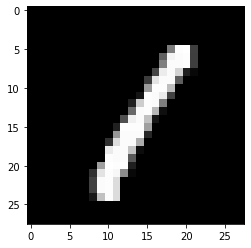

In [213]:
plt.imshow(images[labels==1].reshape(-1, 28, 28)[0], cmap='gray');

Calculate and plot the average digit of $1$.

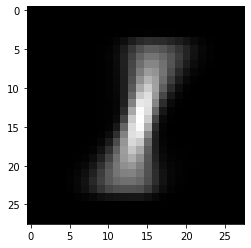

In [230]:
plt.imshow(np.average(images[labels==1].reshape(-1, 28, 28),0), cmap='gray');

We consider our images as vectors and calculate their distance and angle, by using the Euclidean metric on the space of image vectors.

In [231]:
def distance(x0, x1):
    """Compute distance between two vectors x0, x1 using the dot product"""
    distance = np.sum((x1-x0)*(x1-x0))**0.5 # <-- EDIT THIS to compute the distance between x0 and x1
    return distance

def angle(x0, x1):
    """Compute the angle between two vectors x0, x1 using the dot product"""
    angle = np.arccos(np.sum(x0*x1)/(distance(x0,0)*distance(x1,0))) # <-- EDIT THIS to compute angle between x0 and x1
    return angle


Select an image of a digit. Plot it. Find the one, which is closest to it among the next 1000 images. Plot this second image, as well.

In [234]:
# scratch cell
mindist = 100000
first = 0
second2remember = 0
for second in range(1000):
    f = images[first].reshape(28, 28)
    s = images[second].reshape(28, 28)
    d = distance(f.ravel(), s.ravel())
    if 0 < d < mindist:
        mindist = d
        second2remember = second
print(second2remember)

832


## 4.4. Projections

----------------

### 4.4.1. Projection to a one-dimensional space

**Definition**
In the real vector space $\mathbb{R}^n$ the projection of a vector $x \in\mathbb{R}^n$ to a subspace with basis $B = \{b_1, b_2, \ldots, b_m\} \subset \mathbb{R}^n$ is defined to be that element $\pi_B(x) \in {\rm span}(B)$, for which $||x - \pi_B(x)||$ is minimal. 

----------------

**Claim**
For the above defined projection it holds that 
$$ x - \pi_d(x)\ \bot\ {\rm span}(B)$$

*Proof*

Let $y \in {\rm span}(B)$ such that $x - y \ \bot\ {\rm span}(B)$.

For any $b \in {\rm span}(B)$ it holds, that

\begin{align*}
    ||x - b||^2 &= ||(x - y) + (y - b)||^2\\[0.5em]
    & = ||x-y||^2 + ||y-b||^2 + 2 \underbrace{\langle x-y, y-b\rangle}_{ 0, \mbox{ as } y-b\ \in\ {\rm span}(B)}\\[0.5em]
    &\geq ||x-y||^2
\end{align*}

To complete the proof, we will show that the conditions
\begin{align*}
    (1) \quad  y \in {\rm span}(B)\\
    (2) \quad x-y \ \bot \ {\rm span}(B)
\end{align*}
do uniquely determine the vector $y$.

Condition (1) means that there exist the coefficients $\lambda_1, \lambda_2, \ldots, \lambda_m$ such that 

$$y = \lambda_1 b_1 + \lambda_2 b_2 +  \cdots + \lambda_m b_m$$

Condition (2) means that the vector $x- y$ is perpendicular to every $b \in {\rm span}(B)$, so particularly also to the elements $b_i$ of the basis $B$, i.e.

$$\langle x-y, b_i \rangle = 0, \quad \forall i \in \{1,2, \ldots, m\}.$$

Let us substitute in the above formula $y = \lambda_1 b_1 + \lambda_2 b_2 +  \cdots + \lambda_m b_m$.

\begin{align*}
\langle b_i, x - (\lambda_1 b_1 + \lambda_2 b_2 +  \cdots + \lambda_m b_m) \rangle= 0\\[0.5em]
\langle b_i, x - B\cdot \lambda \rangle = 0, \quad \forall i \in \{1,2, \ldots, m\},
\end{align*}

where by $B$ we denote the matrix containing on its columns the basis vectors $b_1, b_2, \ldots b_m$, i.e. $B = [b_1|b_2|\ldots|b_m]$ and $\lambda = \left(
\begin{array}{c}
\lambda_1\\
\lambda_2\\
\ldots\\
\lambda_m
\end{array}
\right)$.

Thus the last equation can be rewritten equivalently as

\begin{align*}
b_i^T \cdot x - B \cdot \lambda = 0, \quad \forall i \in \{1,2, \ldots, m\}
\end{align*}

These $m$ equations can be merged together and written in the following form

\begin{align*}
&B^T \cdot (x - B\cdot \lambda) = \mathbf{0}\\[0.5em]
&B^T \cdot x - B^T \cdot B \cdot \lambda = \mathbf{0}\\[0.5em]
&B^T \cdot B \cdot \lambda = B^T \cdot x\\[0.5em]
&\lambda = \left(B^T\cdot B\right)^{-1} B^T \cdot x \quad \Rightarrow \quad y = B \cdot \left(B^T\cdot B\right)^{-1} B^T \cdot x
\end{align*}

-------------------------

**Remark**

1. In the proof of the above claim we have also derived the projection formula

$$\pi_{B}(x) = B \cdot \left(B^T\cdot B\right)^{-1} B^T \cdot x.$$

Observe that this is an extension of the formula that we have obtained in Chapter 1 for projecting on a single line $b$:

$$\pi_{b}(x) = \frac{b \cdot b^T}{||b||^2} \cdot x.$$


## 4.5. PCA

See explanation on whiteboard.